# Import some packages

You should load packages you may need in this project first

In [1]:
import skimage.io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


# Load character data from the dataset subfolder


In [2]:
# provide your code here
DATASET_DIR = 'dataset/'
classes = os.listdir(DATASET_DIR)
data = []
for cls in classes:
    files = os.listdir(DATASET_DIR +cls)
    for f in files:
        img = skimage.io.imread(DATASET_DIR +cls+"/"+f)
        img = skimage.color.rgb2gray(img)
        data.append({
            'x': img,
            'y': cls
        })
        
random.shuffle(data) 


E:\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if __name__ == '__main__':


In [3]:
data[0]['y']

'M'

# create train data set and test data set 
Using 80/20 rule, 80 precent for trainning, and 20 percent for testing.

In [4]:
X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

assert len(X) == len(y)

x_train = X[:int(.8 * len(X))]
y_train = y[:int(.8 * len(y))]

x_test = X[int(.8 * len(X)):]
y_test = y[int(.8 * len(y)):]
print(x_train[0].shape)

(20, 20)


# Examming and Understand data set for trainning


In [5]:
# you may print out some infomation about train data set 
print(x_train[0])
print(y_train)
print(len(y_train))

[[  0   4   0   9 177 255 255 225   0   0   0   2  16  17  20  14   1   0
    0   1]
 [  0   0   0 136 255 255 255 227  43   0   0  44 227 255 253 189  28   0
    4   0]
 [  2   0   0 139 250 255 255 254 208  56  55 208 255 254 255 255 135   4
    0   2]
 [  0   0   0 133 255 253 254 255 255 202 207 255 251 255 254 253 131   0
    3   0]
 [  0   4   0 135 254 255 255 250 252 253 255 255 252 255 252 255 135   1
    0   0]
 [  2   0   1 135 254 255 253 255 255 255 252 255 255 253 255 255 134   0
    0   5]
 [  0   2   1 132 255 252 254 255 254 255 254 255 255 253 253 254 134   3
    0   0]
 [  0   0   0 135 255 255 255 255 254 255 253 231 222 255 255 255 133   0
    2   0]
 [  2   0   1 134 255 253 255 246 185 185 185  52   1 254 255 254 134   0
    0   0]
 [  0   0   3 131 255 255 255 224   0   0   1   0   0 254 255 255 134   0
    0   0]
 [  3   0   0 136 253 255 253 224   0   0   0   0   1 255 255 255 134   0
    0   0]
 [  0   1   1 132 255 254 255 224   0   0   7   0   1 254 255 253

# Decide a few parameters for trainning

such as batch size, epochs, image size in rows and colomns, etc.

In [6]:
# you decide those parameters below
batch_size = 128
num_classes = len(ys)
epochs = 25

## input image dimensions
img_rows, img_cols = 20, 20

In [7]:
#Extend the data chennels to 4 dimemsions
np.array(x_train).shape

(12920, 20, 20)

In [8]:
def extend_channel(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols) #
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1) #data.shape[0]
        
    return data

x_train = extend_channel(np.array(x_train))
x_test = extend_channel(np.array(x_test))

input_shape = x_train.shape[1:]

# Data normalization

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#TODO
#keras.utils.to_categorical()
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test  = keras.utils.np_utils.to_categorical(y_test)

# Create a CNN model for character recognition

This is an important part of this project. You have to create a cnn model using tensorflow and keras to train the data.


In [10]:
import tensorflow as tf


model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation="relu",
                 input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

# Train your model


In [12]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_freq=1, validation_split=0.2)
score = model.evaluate(x_test, y_test)
print("Loss:",score[0])
print("Acc:",score[1])
model.save_weights("char_cnn.h6")

Train on 10336 samples, validate on 2584 samples
Epoch 1/25
10336/10336 [==============================] - 7s 645us/step - loss: 1.6522 - accuracy: 0.6227 - val_loss: 0.4184 - val_accuracy: 0.9060
Epoch 2/25
10336/10336 [==============================] - 6s 625us/step - loss: 0.3341 - accuracy: 0.9182 - val_loss: 0.2096 - val_accuracy: 0.9586
Epoch 3/25
10336/10336 [==============================] - 7s 630us/step - loss: 0.1789 - accuracy: 0.9576 - val_loss: 0.1619 - val_accuracy: 0.9601
Epoch 4/25
10336/10336 [==============================] - 6s 629us/step - loss: 0.1324 - accuracy: 0.9657 - val_loss: 0.1393 - val_accuracy: 0.9667
Epoch 5/25
10336/10336 [==============================] - 6s 624us/step - loss: 0.0945 - accuracy: 0.9764 - val_loss: 0.1320 - val_accuracy: 0.9698
Epoch 6/25
10336/10336 [==============================] - 6s 622us/step - loss: 0.0755 - accuracy: 0.9810 - val_loss: 0.1360 - val_accuracy: 0.9683
Epoch 7/25
10336/10336 [==============================] - 6s 61

# Visualize training results

In [13]:
epochs_range = range(epochs)
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

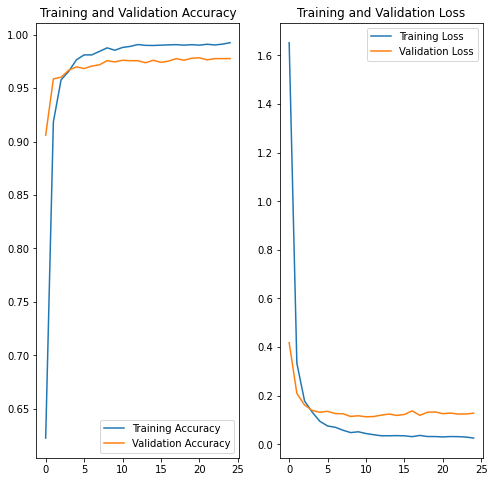

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("Training and Validation Loss.jpg")

# Model Evaluation 

Evaluate your model with test dataset.

make sure your model accuracy should be more than 97 percent. Otherwise, you have to go back to fine tune your model with whatever methods you have learned to improve its accuracy. You have to handle over-fitting or under-fitting problem you may encounter.

In [15]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3231/3231 [==============================] - 1s 158us/step
Test loss: 0.1321928644721604
Test accuracy: 0.9786443710327148


# Save your model weights

You should save your model for car plate recognition purpose later.


In [16]:
# when you finish training, you should save your model in a file
# for carplate_recognition.ipynb
# since it will use this model to recognize car plates 
model.save_weights('char_cnn.h6')